In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob

%matplotlib qt

In [7]:
objp = np.zeros((6*9,3), dtype=np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

objpoints = []
imgpoints = []

images = glob.glob('camera_cal/calib*')

for idx, fname in enumerate(images):
    
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)
    
    if ret:
        objpoints.append(objp)
        imgpoints.append(corners)
        
        # Draw and display the corners
        cv2.drawChessboardCorners(img, (9,6), corners, ret)
        #write_name = 'corners_found'+str(idx)+'.jpg'
        #cv2.imwrite(write_name, img)
        cv2.imshow('img', img)
        cv2.waitKey(500)

cv2.destroyAllWindows()

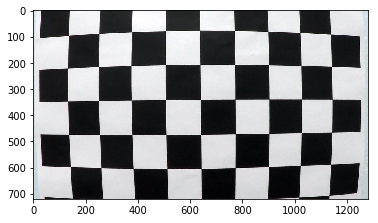

In [16]:
import pickle
%matplotlib inline

img = cv2.imread('camera_cal/calibration1.jpg')
img_size = (img.shape[1], img.shape[0])

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)

dst = cv2.undistort(img, mtx, dist, None, mtx)

plt.imshow(img)

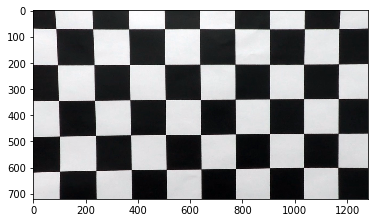

In [17]:
plt.imshow(dst)

In [18]:
dist_pickle = {}
dist_pickle['mtx'] = mtx
dist_pickle['dist'] = dist

pickle.dump(dist_pickle, open('dist_matrix.p', 'wb'))
